# __YÜKSEK DAYANIMLI BETON__ 
### REGRESYON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 999)
pd.set_option("display.float_format", "{:.3f}".format)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
cc = pd.read_csv('concrete_clean.csv')

In [3]:
cc.head(3)

,Cement,Slag,FlyAsh,Water,SPs,CoarseAgg,FineAgg,WC,Day,Strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,0.300,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,0.300,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,0.686,90,40.270


In [4]:
import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [5]:
Y = cc['Strength']
X = cc.drop(['Strength'], axis=1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [7]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 10,593
Trainable params: 10,593
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', 'mape'])

history = model.fit(x_train, y_train, epochs=300, verbose=0)

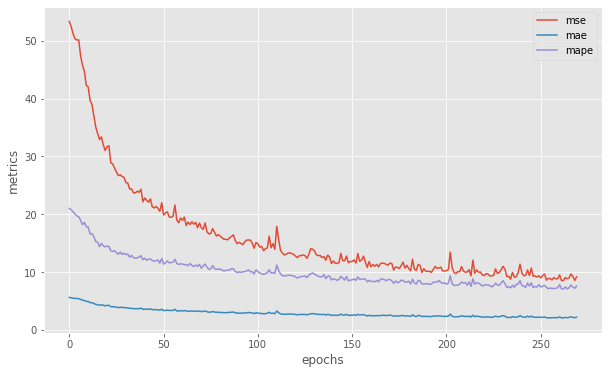

In [9]:
plt.plot(history.history['mse'][30:], label='mse')
plt.plot(history.history['mae'][30:], label='mae')
plt.plot(history.history['mape'][30:], label='mape')
plt.xlabel('epochs')
plt.ylabel('metrics')
plt.legend();

In [10]:
model.evaluate(x_test, y_test, verbose=0) # loss, mse, mae, mape

[29.344860110116834, 29.34486198425293, 3.624725103378296, 12.533305168151855]

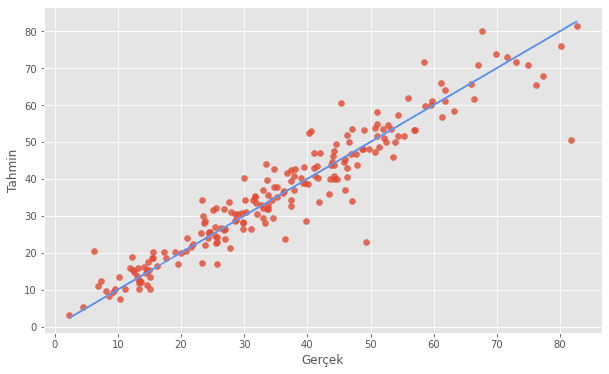

In [11]:
y_pred = model.predict(x_test) 

plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot(y_test, y_test, color='cornflowerblue')
plt.xlabel('Gerçek')
plt.ylabel('Tahmin');

In [12]:
def kerasReg(X,Y):
    pf = pd.DataFrame(columns=['optimizer', 'mse', 'mae', 'mape']) 
    for num,opt in enumerate(['rmsprop','adam','adadelta','adagrad','adamax','nadam'],1): 
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

        standardscaler = StandardScaler()
        x_train = standardscaler.fit_transform(x_train)
        x_test = standardscaler.transform(x_test)

        model = Sequential()
        model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1))

        model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mse', 'mae', 'mape'])
        model.fit(x_train, y_train, epochs=300, verbose=0)
        mOut = model.evaluate(x_test, y_test, verbose=0) # loss, mse, mae, mape

        pf.loc[num] = (str(opt), mOut[1], mOut[2], mOut[3])     
    return pf

In [13]:
def kerasPlt(X, Y):
    plt.figure(figsize=(18,7))
    for num,opt in enumerate(['rmsprop','adam','adadelta','adagrad','adamax','nadam'],1): 
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

        standardscaler = StandardScaler()
        x_train = standardscaler.fit_transform(x_train)
        x_test = standardscaler.transform(x_test)

        model = Sequential()
        model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1))
        
        model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mse', 'mae', 'mape'])
        model.fit(x_train, y_train, epochs=300, verbose=0)
        y_pred = model.predict(x_test) 
                
        plt.subplot(2, 3, num)
        plt.scatter(y_test, y_pred, alpha=0.8)
        plt.plot(y_test, y_test, color='cornflowerblue')
        plt.title(str(opt))
        plt.tight_layout() 
    return 

In [14]:
kerasReg(X,Y)

,optimizer,mse,mae,mape
1,rmsprop,36.571,4.244,13.722
2,adam,26.364,3.513,12.432
3,adadelta,77.762,6.859,20.793
4,adagrad,28.239,3.817,13.835
5,adamax,24.763,3.444,12.166
6,nadam,37.129,4.493,14.432


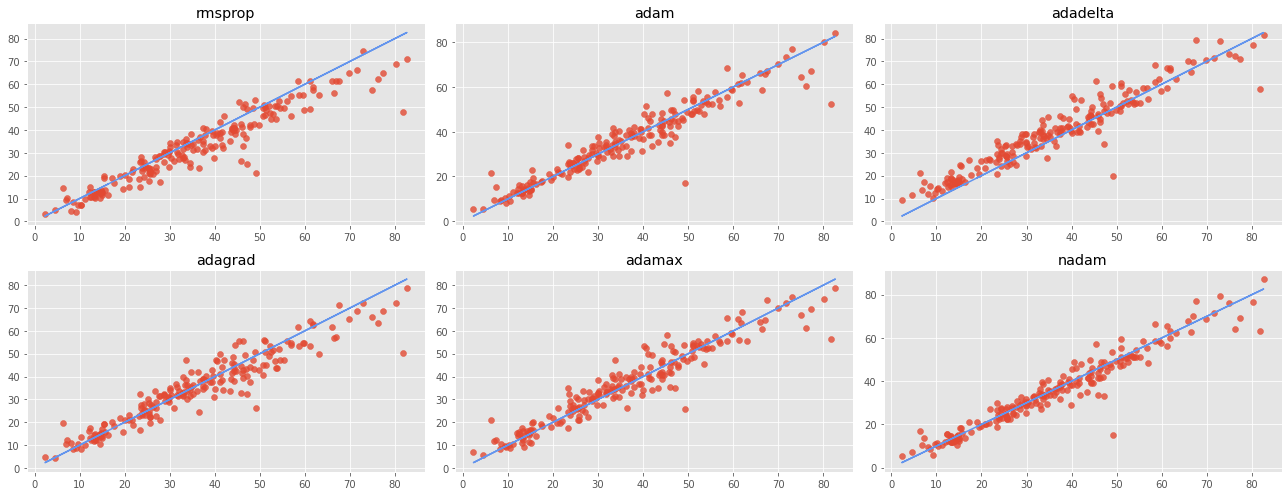

In [15]:
kerasPlt(X,Y)

# __BANKA KAMPANYASI__
### SINIFLANDIRMA

In [16]:
bk = pd.read_csv('bank_clean.csv')

In [17]:
bk.head(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_management,job_retired,job_self-employed,job_services,job_student,job_unemployed,marital_married,education_basic.school,education_high.school,education_professional.course,education_university.degree,housing_yes,loan_yes,customer_yes,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,4,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,4,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,2,1,0,0,1.100,94.000,-36.000,5.000,5191.000,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [18]:
Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [20]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 128)               5632      
_________________________________________________________________
dense_54 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_55 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 17        
Total params: 14,945
Trainable params: 14,945
Non-trainable params: 0
_________________________________________________________________


In [21]:
import keras.backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

metricsList = [keras.metrics.BinaryAccuracy(name='accuracy'),
               keras.metrics.Precision(name='precision'),
               keras.metrics.Recall(name='recall'),
               keras.metrics.AUC(name='auc'), f1]

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metricsList)

model.fit(x_train, y_train, epochs=20, verbose=0, batch_size=300)

In [23]:
model.evaluate(x_test, y_test)

7922/7922 [==============================] - 0s 47us/step


[0.2783797119820067,
 0.8980055451393127,
 0.550000011920929,
 0.3205128312110901,
 0.7916639447212219,
 0.34058094024658203]

In [24]:
def kerasCla(X,Y):
    pf = pd.DataFrame(columns=['optimizer', 'loss', 'accuracy', 'precision', 'recall', 'auc', 'f1']) 
    for num,opt in enumerate(['sgd','rmsprop','adam','adadelta','adagrad','adamax','nadam'],1): 
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

        standardscaler = StandardScaler()
        x_train = standardscaler.fit_transform(x_train)
        x_test = standardscaler.transform(x_test)

        model = Sequential()
        model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        metricsList = [keras.metrics.BinaryAccuracy(name='accuracy'),
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall'),
                       keras.metrics.AUC(name='auc'), f1]

        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=metricsList)
        model.fit(x_train, y_train, epochs=20, verbose=0)
        mOut = model.evaluate(x_test, y_test, verbose=0) # loss, mse, mae, mape

        pf.loc[num] = (str(opt), mOut[0], mOut[1], mOut[2], mOut[3], mOut[4], mOut[5])     
    return pf

In [25]:
kerasCla(X,Y)

,optimizer,loss,accuracy,precision,recall,auc,f1
1,sgd,0.267,0.902,0.595,0.300,0.796,0.332
2,rmsprop,0.284,0.902,0.606,0.283,0.796,0.329
3,adam,0.299,0.895,0.532,0.251,0.769,0.288
4,adadelta,0.296,0.896,0.532,0.325,0.772,0.349
5,adagrad,0.267,0.904,0.616,0.290,0.802,0.327
6,adamax,0.287,0.899,0.566,0.279,0.782,0.320
7,nadam,0.304,0.897,0.538,0.334,0.775,0.357


In [26]:
from imblearn.over_sampling import SMOTE
x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)

kerasCla(x_smote,y_smote) #smote

,optimizer,loss,accuracy,precision,recall,auc,f1
1,sgd,0.285,0.880,0.936,0.815,0.948,0.865
2,rmsprop,0.304,0.882,0.935,0.820,0.946,0.868
3,adam,0.285,0.889,0.905,0.870,0.952,0.881
4,adadelta,0.280,0.891,0.902,0.877,0.952,0.884
5,adagrad,0.268,0.888,0.907,0.864,0.952,0.879
6,adamax,0.273,0.890,0.919,0.856,0.953,0.881
7,nadam,0.286,0.890,0.903,0.873,0.951,0.883


- Daha anlamlı sonuçlar alabilmek için yüksek epochs ve farklı optimizer değerleri üzerinde çalışıldı. Epochs değeri büyüdükçe daha iyi sonuçlar alındı ama işlem süresinde artış oldu, bu sorunu batch_size ile aşmaya çalışıldı.
- Regresyon sonuçlarında ciddi bir artış olmasına rağmen sınıflandırma probleminde büyük bir artış olmadı. Sınıflandırma verisi imbalanced olduğundan dolayı smote uygulandı, iyi sonuçalınsada diğer algoritmalara göre çok yüksek sonuç alınmadı.